<!---
<style>
div.warn{
    display: all;
    position: relative;
    justify-content: center;
    align-items: center;
    color: black;
    align: center;
    font-family: Garamond;
    font-size: 18px;
    margin: 0em 0em 0em 0em;/* top, right, bottom, left */
    width: 1000px;
    height: 160px;
    padding: 0.5em;
    text-align: center;
    text-indent: 0px;
    text-shadow: 0px;
    border-width:5px;
    border-color:#ffffff;/*white;*/
    border-style: double;
    border-radius: 2px;
    background-color: #00b8ff;
}

</style>
<div class=warn>
<img src="./data/maugustomaidana.jpg" alt="Augusto Maidana" align="left" width="120px" height="120px" >
<img src="./data/it_academy_logo.png" alt="IT Academy" align="bottom" width="30%" height="30%" ><br>
<h1><b>S11 T01:</b> Practicant amb training i test sets</h1>

<br>

<p style="text-align:left;">
    <b>M. Augusto Maidana Silanes</b>
    <span style="float:right;">
        13/10/2021
    </span>
</p>
</div>

<br>
--->

![Header](Header_IT_Academy.png)

<!---
# S11 T01: Practicant amb training i test set

Type &nbsp; to add a single space.
Type &ensp; to add 2 spaces.
Type &emsp; to add 4 spaces.

> 
> *Augusto Maidana* &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; (*13/10/2021*)
>
--->

&nbsp;

## Descripció

Familiaritza't amb la programació científica mitjantçant la llibreria SKLearn / Scikitlearn.

**Nivell 1**

- Exercici 1:

Parteix el conjunt de dades ``DelayedFlights.csv`` en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [1]:
# Render our plots inline
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, power_transform, quantile_transform, PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
#from pandas import DataFrame

In [2]:
#plt.show(block=True)
#pd.describe_option()
plt.style.use('ggplot')
#plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 5)

directory = "../estructures_dataframe/"
file = "DelayedFlights.csv"
# Set floating-point format
pd.set_option('float_format', '{:.2f}'.format)
# Reading data from CSV: with CSV files a single line is needed to load the data:
DelayedFlights_df = pd.read_csv(directory + file, index_col=False)
DelayedFlights_df.reset_index(drop=True, inplace=True)
DelayedFlights_df.drop('Unnamed: 0', axis=1, inplace=True)

# let's see the DataFrame
DelayedFlights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.00,1955,2211.00,2225,WN,335,...,4.00,8.00,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.00,735,1002.00,1000,WN,3231,...,5.00,10.00,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.00,620,804.00,750,WN,448,...,3.00,17.00,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.00,1755,1959.00,1925,WN,3920,...,3.00,10.00,0,N,0,2.00,0.00,0.00,0.00,32.00
4,2008,1,3,4,1940.00,1915,2121.00,2110,WN,378,...,4.00,10.00,0,N,0,NaN,NaN,NaN,NaN,NaN


### We are going to print the number of rows and columns of the data frame:

In [3]:
# Data Frame shape
DelayedFlights_df.shape

(1936758, 29)

### The following is a summary of some basic statistical details:

In [4]:
# print a statistical description of the data set
DelayedFlights_df.describe(include='all')

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.00,1936758.00,1936758.00,1936758.00,1936758.00,1936758.00,1929648.00,1936758.00,1936758,1936758.00,...,1929648.00,1936303.00,1936758.00,1936758,1936758.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,...,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,NaN,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377602,NaN,...,NaN,NaN,NaN,1936125,NaN,NaN,NaN,NaN,NaN,NaN
mean,2008.00,6.11,15.75,3.98,1518.53,1467.47,1610.14,1634.22,NaN,2184.26,...,6.81,18.23,0.00,NaN,0.00,19.18,3.70,15.02,0.09,25.30
std,0.00,3.48,8.78,2.00,450.49,424.77,548.18,464.63,NaN,1944.70,...,5.27,14.34,0.02,NaN,0.06,43.55,21.49,33.83,2.02,42.05
min,2008.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,NaN,1.00,...,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00
25%,2008.00,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,NaN,610.00,...,4.00,10.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00
50%,2008.00,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,NaN,1543.00,...,6.00,14.00,0.00,NaN,0.00,2.00,0.00,2.00,0.00,8.00
75%,2008.00,9.00,23.00,6.00,1900.00,1815.00,2030.00,2014.00,NaN,3422.00,...,8.00,21.00,0.00,NaN,0.00,21.00,0.00,15.00,0.00,33.00


### Let's look at the names of the columns of the data frame:

In [5]:
# Data Frame columns
DelayedFlights_df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
# rename the "UniqueCarrier" column to "AL"
DelayedFlights_df.rename({'UniqueCarrier':'AL'}, inplace=True,axis=1)
DelayedFlights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,AL,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.00,1955,2211.00,2225,WN,335,...,4.00,8.00,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.00,735,1002.00,1000,WN,3231,...,5.00,10.00,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.00,620,804.00,750,WN,448,...,3.00,17.00,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.00,1755,1959.00,1925,WN,3920,...,3.00,10.00,0,N,0,2.00,0.00,0.00,0.00,32.00
4,2008,1,3,4,1940.00,1915,2121.00,2110,WN,378,...,4.00,10.00,0,N,0,NaN,NaN,NaN,NaN,NaN


### We select the columns we are going to work on and print the first 5 rows of the DataFrame

#### Brief description of the columns and their types and units:

**DepTime** :
Actual Departure Time (stored as float, local time in hhmm)

**ArrTime** :
Actual Arrival Time (stored as float, local time in hhmm)

**AirTime** :
Airborne Time for the flight, in minutes (stored as integer).

**ArrDelay** :
Arrival Delay, in minutes (stored as integer).

**DepDelay** :
Departure Delay, in minutes (stored as integer).

**Distance** :
Flight Distance between airports (stored as integer, distance in miles = 1,60934 km)

**CarrierDelay** :
Delay, in minutes, attributable to the carrier (stored integer).

**Note**: DepTime and ArrTime are the real times at which take-off and landing took place. The hours of the take-off and landing is coded as a float where the two first digits indicate the hour and the two last, the minutes.

In [7]:
# selection of the set of columns to work with
subset_df = DelayedFlights_df[['AL', 'DepTime', 'ArrTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'CarrierDelay']].copy()
subset_df.head()

,AL,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay
0,WN,2003.00,2211.00,116.00,-14.00,8.00,810,NaN
1,WN,754.00,1002.00,113.00,2.00,19.00,810,NaN
2,WN,628.00,804.00,76.00,14.00,8.00,515,NaN
3,WN,1829.00,1959.00,77.00,34.00,34.00,515,2.00
4,WN,1940.00,2121.00,87.00,11.00,25.00,688,NaN


### Let's print a concise summary of a DataFrame:

In [8]:
# print non-null values
subset_df.iloc[: 10000].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AL            10000 non-null  object 
 1   DepTime       10000 non-null  float64
 2   ArrTime       9969 non-null   float64
 3   AirTime       9969 non-null   float64
 4   ArrDelay      9969 non-null   float64
 5   DepDelay      10000 non-null  float64
 6   Distance      10000 non-null  int64  
 7   CarrierDelay  5792 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 625.1+ KB


In [9]:
# print null values
subset_df.isnull().sum()

AL                   0
DepTime              0
ArrTime           7110
AirTime           8387
ArrDelay          8387
DepDelay             0
Distance             0
CarrierDelay    689270
dtype: int64

### Filtering to check for rows containing NANs in the dataset:

In [10]:
# creating bool series True for NaN values
mask = subset_df.loc[:,['ArrTime', 'AirTime', 'ArrDelay', 'CarrierDelay']].isna().any(axis=1)

# filtering data: displaying data only with values = NaN 
subset_df[mask]

,AL,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay
0,WN,2003.00,2211.00,116.00,-14.00,8.00,810,NaN
1,WN,754.00,1002.00,113.00,2.00,19.00,810,NaN
2,WN,628.00,804.00,76.00,14.00,8.00,515,NaN
4,WN,1940.00,2121.00,87.00,11.00,25.00,688,NaN
6,WN,706.00,916.00,106.00,1.00,6.00,828,NaN
...,...,...,...,...,...,...,...,...
1936739,DL,1100.00,1350.00,91.00,3.00,15.00,692,NaN
1936740,DL,1200.00,1924.00,238.00,3.00,10.00,2172,NaN
1936750,DL,1531.00,1822.00,88.00,-1.00,9.00,692,NaN
1936756,DL,1251.00,1446.00,89.00,9.00,11.00,533,NaN


### We eliminate the columns that have NAN:

In [11]:
# droping the rows whose all data is missing or contain null values (NaN)
subset_df = subset_df.dropna(axis = 0, how ='any')

### Check if the NANs still exist in the data set:

In [12]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247488 entries, 3 to 1936755
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   AL            1247488 non-null  object 
 1   DepTime       1247488 non-null  float64
 2   ArrTime       1247488 non-null  float64
 3   AirTime       1247488 non-null  float64
 4   ArrDelay      1247488 non-null  float64
 5   DepDelay      1247488 non-null  float64
 6   Distance      1247488 non-null  int64  
 7   CarrierDelay  1247488 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 85.7+ MB


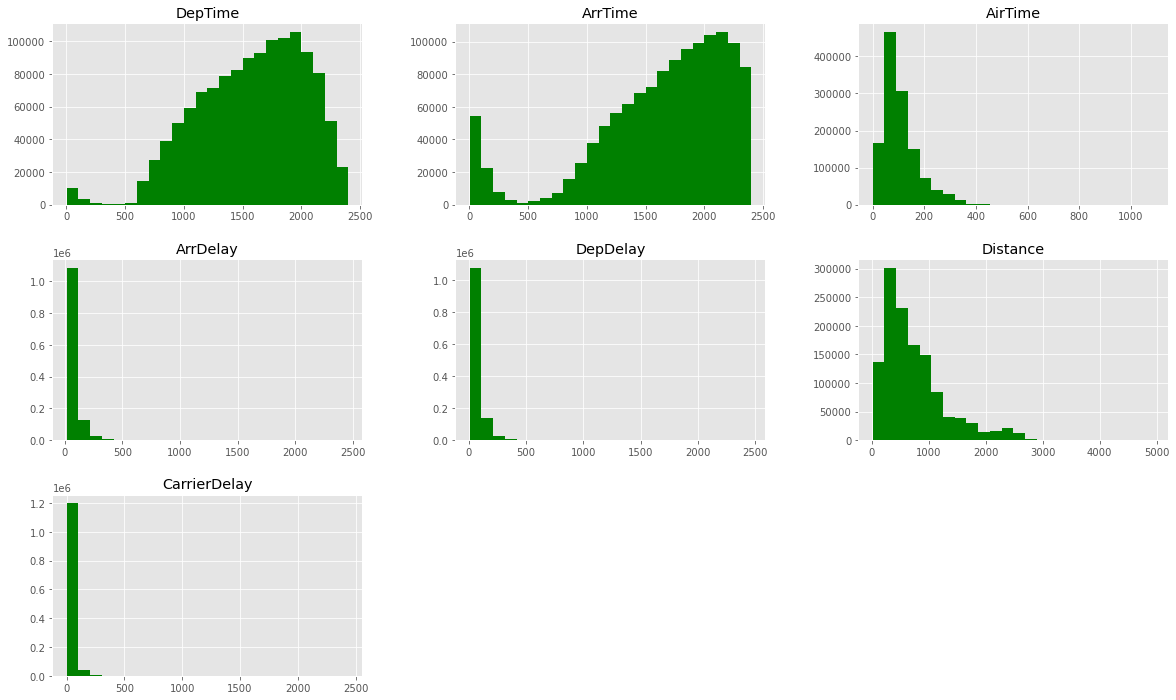

In [13]:
# plot the histogram of the numerical data
subset_df.select_dtypes(exclude='object').hist(figsize=(20, 12), color='green', bins=24)
plt.show()

### Two flight frequency peaks are observed between 15-20 for takeoff and 20-24 hours for landing, DepTime and ArrTime respectively:

**Note**: using bins = 24 we represent one bar per hour  

array([[<AxesSubplot:title={'center':'DepTime'}>,
        <AxesSubplot:title={'center':'ArrTime'}>]], dtype=object)

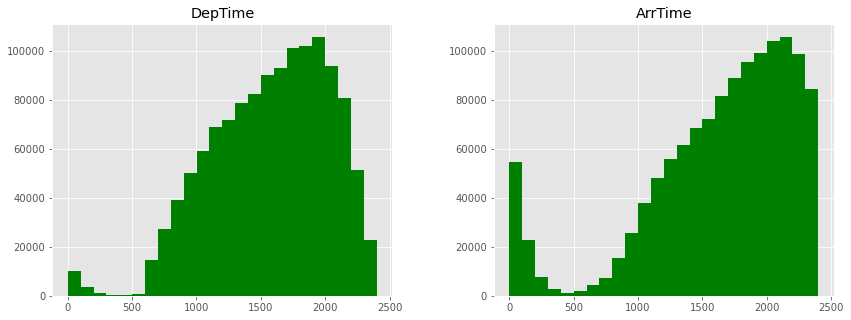

In [14]:
# illustrate histogram details of Departure and Arrival Times
features = ['DepTime', 'ArrTime']
subset_df[features].hist(figsize=(14, 5), color='green', bins=24)

### When calculating a kernel density estimate, a sawing effect is produced by the way the data is represented. By representing the hour with the first two digits and the minutes with the next two digits, we only have flights in the first 60 digits of the 100 with which the hour is represented:

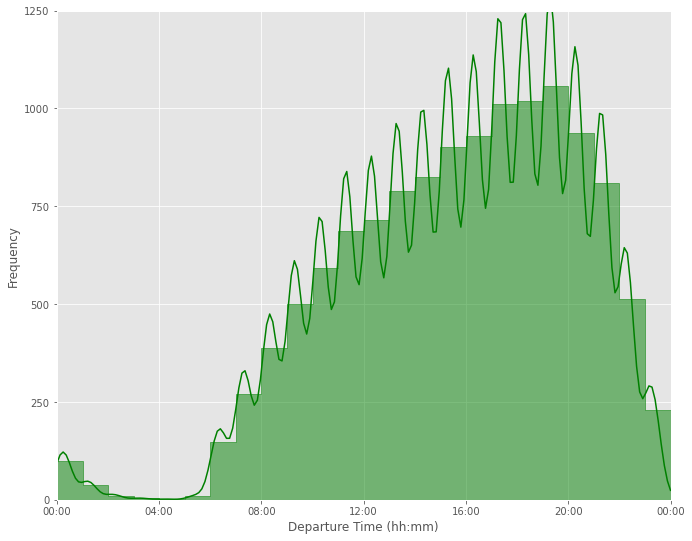

In [15]:
# illustrate histogram details of Departure Times
fig, ax = plt.subplots(figsize=(11, 9))
sns.histplot(data=subset_df, x="DepTime", stat='frequency', kde=True, common_norm=True, log_scale=False, element="step", fill=True, bins=24, color='green')
ax.set_xticks([0,400,800,1200,1600,2000,2400])
ax.set_xticklabels(['00:00','04:00','08:00','12:00','16:00','20:00','00:00'])
ax.set(xlabel='Departure Time (hh:mm)')
ax.set_xlim([0,2400])
ax.set_ylim([0,1250])
ax.set_yticks([0,250,500,750,1000,1250])
plt.show()

### We have calculated the correlation between the variables and found very logical relationships, such as flight time being strongly related to distance or flight delay being related to departure delay. It is also observed that departure or arrival delays condition in the same way, almost 50% of airline delays. 

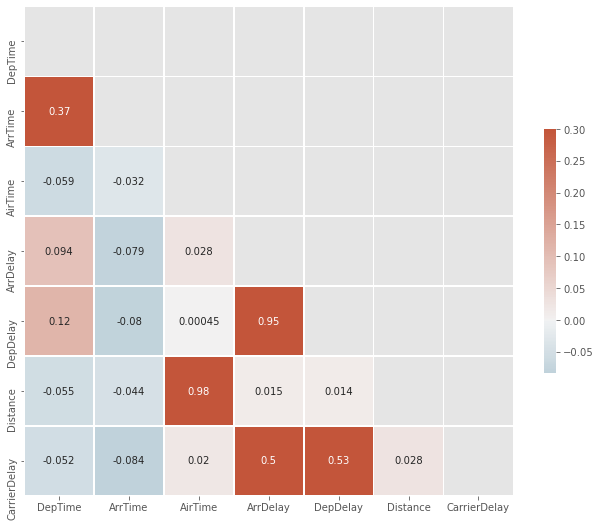

In [16]:
# adjust plot
#sns.set(rc={'figure.figsize': (14, 5)})
output="corr_matrix.png"

# Compute the correlation matrix
corr_mat = subset_df.select_dtypes(include='number').corr()

# Generate a mask for the upper triangle without the diagonal k = 0
mask = np.triu(np.ones_like(corr_mat, dtype=bool), k=0)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#cmap = sns.cubehelix_palette(20, light=0.95, dark=0.15)

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(corr_mat, mask=mask,  annot=True, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# save to file
#fig = sns_plot.get_figure()
#fig.savefig(output)

### Let’s split our data into features (X) and target (y) sets:

In [17]:
# So, let’s first split our data into training and testing sets:
# Create X features (DataFrame)
X = subset_df.loc[:,['AL', 'DepTime', 'ArrTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance']]
# Create y responses (Series)
y = subset_df.loc[:,'CarrierDelay']
#X = subset_df.iloc[:, :6]
#y = subset_df.iloc[:, 6:7]
print(X.head())
print(y.head())

    AL  DepTime  ArrTime  AirTime  ArrDelay  DepDelay  Distance
3   WN  1829.00  1959.00    77.00     34.00     34.00       515
5   WN  1937.00  2037.00   230.00     57.00     67.00      1591
7   WN  1644.00  1845.00   107.00     80.00     94.00       828
9   WN  1452.00  1640.00   213.00     15.00     27.00      1489
11  WN  1323.00  1526.00   110.00     16.00     28.00       838
3     2.00
5    10.00
7     8.00
9     3.00
11    0.00
Name: CarrierDelay, dtype: float64


### Split training and test data:

In [18]:
# split a dataset into train and test sets
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(835816, 7) (411672, 7) (835816,) (411672,)


### Description of training data:

In [19]:
X_train.describe()

,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance
count,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00
mean,1559.21,1617.00,107.42,63.31,59.69,741.62
std,454.09,583.93,68.13,60.80,59.91,558.89
min,1.00,1.00,0.00,15.00,6.00,11.00
25%,1232.00,1326.00,58.00,26.00,24.00,334.00
50%,1619.00,1737.00,90.00,43.00,41.00,595.00
75%,1924.00,2048.00,136.00,79.00,75.00,972.00
max,2400.00,2400.00,1091.00,2461.00,2457.00,4962.00


### Description of test data:

In [20]:
X_test.describe()

,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance
count,411672.00,411672.00,411672.00,411672.00,411672.00,411672.00
mean,1558.06,1616.25,107.41,63.26,59.64,741.53
std,454.81,583.96,68.26,60.66,59.78,560.32
min,1.00,1.00,0.00,15.00,6.00,11.00
25%,1231.00,1325.00,58.00,26.00,24.00,334.00
50%,1617.00,1736.00,89.00,43.00,41.00,595.00
75%,1924.00,2048.00,136.00,79.00,75.00,967.00
max,2400.00,2400.00,654.00,2453.00,2467.00,4962.00


### Null hypothesis test for training and test samples:

In [21]:
from scipy import stats

alpha = 0.05
null_test = {}
for item in list(X_test.select_dtypes(exclude='object').columns):
    stat, p = stats.ttest_ind(X_train[item], X_test[item], alternative= 'two-sided')
    if p > alpha:
	    null_test[item] = [stat, p, alpha, "Not-Ref"]        
    else:
	    null_test[item] = [stat, p, alpha, "Refused"]

null_test = pd.DataFrame(null_test, index=['Stat', 'p', 'alpha', 'H0']).transpose()
print('Null hypothesis test for Training and Test samples (H0 != H1):\n', null_test)

Null hypothesis test for Training and Test samples (H0 != H1):
          Stat    p alpha       H0
DepTime  1.34 0.18  0.05  Not-Ref
ArrTime  0.67 0.50  0.05  Not-Ref
AirTime  0.10 0.92  0.05  Not-Ref
ArrDelay 0.46 0.65  0.05  Not-Ref
DepDelay 0.45 0.65  0.05  Not-Ref
Distance 0.08 0.93  0.05  Not-Ref


**Nivell 2**

- Exercici 2:

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

### Obtain numerical data from the training data set:

In [22]:
# drop non-numeric cols on training data
X_train_num = X_train._get_numeric_data() 
#X_train_num = X_train.select_dtypes(exclude='object')
X_train_num.head()

,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance
695106,1340.00,1900.00,237.00,20.00,30.00,2165
1497028,1315.00,1509.00,216.00,84.00,90.00,1589
1599784,1659.00,1813.00,108.00,20.00,9.00,680
507616,1511.00,1715.00,95.00,30.00,41.00,650
1056664,1608.00,2113.00,158.00,18.00,28.00,1235


### Obtain numerical data from the testing data set:

In [23]:
# drop non-numeric cols on test data
X_test_num = X_train._get_numeric_data() 
X_test_num.head()

,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance
695106,1340.00,1900.00,237.00,20.00,30.00,2165
1497028,1315.00,1509.00,216.00,84.00,90.00,1589
1599784,1659.00,1813.00,108.00,20.00,9.00,680
507616,1511.00,1715.00,95.00,30.00,41.00,650
1056664,1608.00,2113.00,158.00,18.00,28.00,1235


### Power transformations are applied to make the data more Gaussian by means of a family of parametric and monotonic transformations:

In [24]:
X_train_num_power = power_transform(X_train_num, standardize=True)
X_train_num_power = pd.DataFrame(X_train_num_power, columns=X_train_num.columns)
X_train_num_power.head()

,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance
0,-0.55,0.47,1.61,-1.24,-0.39,1.87
1,-0.60,-0.30,1.46,0.86,0.91,1.40
2,0.17,0.29,0.31,-1.24,-1.84,0.20
3,-0.17,0.10,0.10,-0.55,-0.02,0.14
4,0.05,0.92,0.94,-1.43,-0.47,1.04


### We apply a type of Quantile Transformation to transform the features to a normal distribution using the quantile information:

In [25]:
X_train_num_quant = quantile_transform(X_train_num, output_distribution='normal', random_state=42)
X_train_num_quant = pd.DataFrame(X_train_num_quant, columns=X_train_num.columns)
X_train_num_quant.head()

,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance
0,-0.48,0.27,1.54,-1.11,-0.37,1.80
1,-0.56,-0.41,1.39,0.74,0.88,1.34
2,0.12,0.11,0.29,-1.11,-1.77,0.20
3,-0.21,-0.06,0.09,-0.45,-0.00,0.14
4,-0.04,0.80,0.94,-1.36,-0.46,1.06


### We perform a second-degree polynomial decomposition of the AirTime and Distance features:

In [26]:
X_train_time_dist = X_train_num[['AirTime','Distance']]
polynom = PolynomialFeatures(degree=2, include_bias=False)
X_train_time_dist = pd.DataFrame(polynom.fit_transform(X_train_time_dist), columns=['AirTime(X1)', 'Distance(X2)', 'X1^2', 'X1·X2','X2^2'])
X_train_time_dist.head()

,AirTime(X1),Distance(X2),X1^2,X1·X2,X2^2
0,237.00,2165.00,56169.00,513105.00,4687225.00
1,216.00,1589.00,46656.00,343224.00,2524921.00
2,108.00,680.00,11664.00,73440.00,462400.00
3,95.00,650.00,9025.00,61750.00,422500.00
4,158.00,1235.00,24964.00,195130.00,1525225.00


### The PowerTransformer can then be used to automatically remove the skew from the data

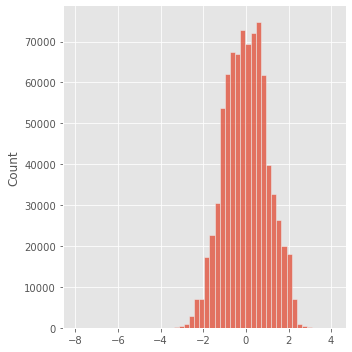

In [29]:
# power transform the AirTime data
power = PowerTransformer(method='yeo-johnson', standardize=True)
AirTime = X_train_num.AirTime.values.reshape(-1, 1)
data_trans = power.fit_transform(AirTime)
AirTime_df = pd.DataFrame(data_trans, columns=['AirTime'])
# histogram of the transformed data
sns.displot(data=AirTime_df, legend=False, bins=50, color='green')

### Version of applying the Box-Cox transform to the scaled dataset:

> It is important to note that the Box-Cox procedure can only be applied to data that is strictly positive.

In [28]:
# retrieve just the numeric input values
data = X_train_num.values[:,:]
# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data = pipeline.fit_transform(data)
# convert the array back to a dataframe
dataset = pd.DataFrame(data, columns = ['DepTime','ArrTime','AirTime','ArrDelay','DepDelay','Distance'])
dataset.head()
# histograms of the variables
#dataset.hist(color='green', bins=50)
#plt.show()

,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance
0,-0.58,0.40,1.67,-1.15,-0.54,1.87
1,-0.63,-0.43,1.53,0.89,1.03,1.50
2,0.13,0.20,0.30,-1.15,-1.51,0.18
3,-0.21,-0.02,0.06,-0.68,-0.14,0.11
4,0.01,0.96,1.01,-1.25,-0.62,1.13


### Histograms of the variables:

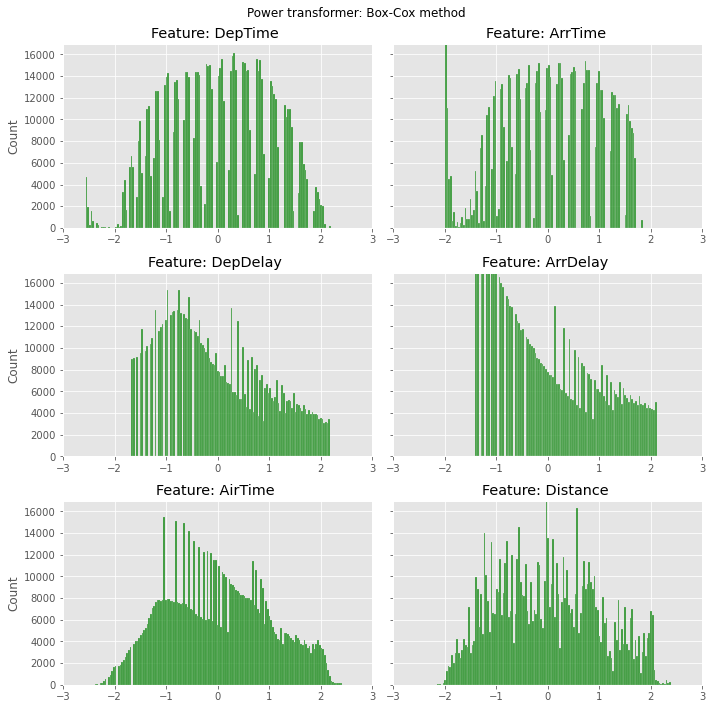

In [30]:
# select the columns to be plotted
cols = ['DepTime', 'ArrTime','DepDelay','ArrDelay','AirTime','Distance']

# create the figure and axes
# sharex, sharey: bool or {'none', 'all', 'row', 'col'}, default: False
fig, axes = plt.subplots(3, 2, sharex='none', sharey=True, squeeze=False, gridspec_kw={"height_ratios":(.85,.85,.85)}, figsize=(10,10))
fig.suptitle('Power transformer: Box-Cox method')
axes = axes.ravel()  # flattening the array makes indexing easier

# stat: str
# Aggregate statistic to compute in each bin.
# count: show the number of observations in each bin
# frequency: show the number of observations divided by the bin width
# probability: or proportion: normalize such that bar heights sum to 1
# percent: normalize such that bar heights sum to 100
# density: normalize such that the total area of the histogram equals 1

for col, ax in zip(cols, axes):
    sns.histplot(data=dataset[col], color='green', kde=False, stat='count', ax=ax)
    ax.set_title('Feature: {} '.format(col))
    #ax.set(xlabel=col, ylabel='')
    ax.set(xlim=(-3,3), ylim=(0, None))
    x_axis = ax.axes.get_xaxis()
    x_axis.set_label_text('foo')
    x_label = x_axis.get_label()
    x_label.set_visible(False)

#plt.legend(title='', loc='upper left', labels=['Count'], bbox_to_anchor=(1, 1))
fig.tight_layout()
plt.show()
plt.close()

## Normalization using sklearn

## What is Normalization?

**Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling**.

Here’s the formula for normalization:

$$
X' = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

Here, $X_{max}$ and $X_{min}$ are the maximum and the minimum values of the feature respectively.

* When the value of $X$ is the minimum value in the column, the numerator will be $0$, and hence $X'$ is $0$.
* On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of $X'$ is $1$.
* If the value of $X$ is between the minimum and the maximum value, then the value of $X'$ is between $0$ and $1$.

Let's try to normalizate our data.

In [31]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# copy of datasets
X_train_norm = X_train_num.copy()
X_test_norm = X_test_num.copy()

# fit scaler on training data
norm = MinMaxScaler().fit(X_train_norm)

# transform training data
X_train_norm = norm.transform(X_train_norm)
X_train_norm = pd.DataFrame(X_train_norm, columns=['DepTime', 'ArrTime', 'AirTime', 'ArrDelay', 'DepDelay','Distance'])
print("Scaled Train Data: \n\n")
print(X_train_norm.head())

# transform testing data
X_test_norm = norm.transform(X_test_norm)
X_test_norm = pd.DataFrame(X_test_norm, columns=['DepTime', 'ArrTime', 'AirTime', 'ArrDelay', 'DepDelay','Distance'])
print("\n\nScaled Test Data: \n\n")
print(X_test_norm.head())

Scaled Train Data: 


   DepTime  ArrTime  AirTime  ArrDelay  DepDelay  Distance
0     0.56     0.79     0.22      0.00      0.01      0.44
1     0.55     0.63     0.20      0.03      0.03      0.32
2     0.69     0.76     0.10      0.00      0.00      0.14
3     0.63     0.71     0.09      0.01      0.01      0.13
4     0.67     0.88     0.14      0.00      0.01      0.25


Scaled Test Data: 


   DepTime  ArrTime  AirTime  ArrDelay  DepDelay  Distance
0     0.56     0.79     0.22      0.00      0.01      0.44
1     0.55     0.63     0.20      0.03      0.03      0.32
2     0.69     0.76     0.10      0.00      0.00      0.14
3     0.63     0.71     0.09      0.01      0.01      0.13
4     0.67     0.88     0.14      0.00      0.01      0.25


## Standardization using sklearn

## What is Standardization?

**Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation**.

Here’s the formula for standardization:

$$
X' = \frac{X - \mu}{\sigma}
$$

* Feature scaling: $\mu$ is the mean of the feature values and
* Feature scaling: $\sigma$ is the standard deviation of the feature values. Note that in this case, the values are not restricted to a particular range.

Let’s try to standardize our data.

In [32]:
# data standardization with sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train_num.copy()
X_test_stand = X_test_num.copy()

# numerical features
num_cols = ['DepTime', 'ArrTime', 'AirTime', 'ArrDelay', 'DepDelay','Distance']

# apply standardization on numerical features
for i in num_cols:

    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

X_train_stand.head()

,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance
695106,-0.48,0.48,1.90,-0.71,-0.50,2.55
1497028,-0.54,-0.18,1.59,0.34,0.51,1.52
1599784,0.22,0.34,0.01,-0.71,-0.85,-0.11
507616,-0.11,0.17,-0.18,-0.55,-0.31,-0.16
1056664,0.11,0.85,0.74,-0.75,-0.53,0.88


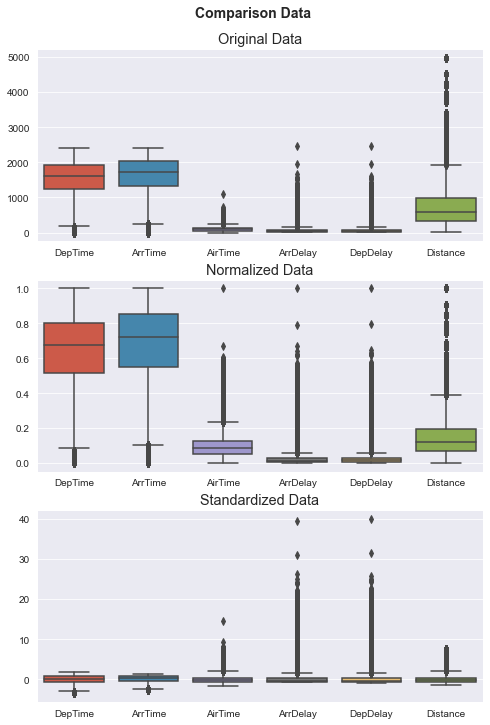

In [33]:
#import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (8, 12)
fig, axes = plt.subplots(3, 1)
sns.boxplot(data = X_train, orient='v' , ax=axes[0]).set(title='Original Data')
sns.boxplot(data = X_train_norm, orient='v' , ax=axes[1]).set(title='Normalized Data')
sns.boxplot(data = X_train_stand, orient='v' , ax=axes[2]).set(title='Standardized Data')
# move overall title up
fig.subplots_adjust(hspace = 0.2)

# add overall title
fig.suptitle('Comparison Data', x=0.5, y=0.93, fontsize=14, fontweight="bold")
plt.show()

In [34]:
# Checking for the labels in the categorical parameters
print("There are {} Airlines".format(len(X_train['AL'].unique())))

There are 20 Airlines


In [35]:
# Checking for the label counts in the categorical parameters
print("Each airline has the following number of entries :")
X_train['AL'].value_counts()

Each airline has the following number of entries :


WN    136553
AA     88418
MQ     65362
UA     63995
OO     59626
XE     48453
DL     48238
US     39982
CO     39440
EV     38086
NW     36780
YV     33783
FL     31405
OH     26333
B6     25568
9E     23869
AS     16107
F9     10733
HA      2871
AQ       214
Name: AL, dtype: int64

In [36]:
print("Each airline has the following number of entries in percentage (%):")
X_train.AL.value_counts(normalize=True)

Each airline has the following number of entries in percentage (%):


WN   0.16
AA   0.11
MQ   0.08
UA   0.08
OO   0.07
XE   0.06
DL   0.06
US   0.05
CO   0.05
EV   0.05
NW   0.04
YV   0.04
FL   0.04
OH   0.03
B6   0.03
9E   0.03
AS   0.02
F9   0.01
HA   0.00
AQ   0.00
Name: AL, dtype: float64

In [37]:
p = X_train.AL.value_counts(normalize=True)[:15].sum().round(2)
print("The 15 airlines with the most registrations represent {} % of the total.:".format(p*100))

The 15 airlines with the most registrations represent 94.0 % of the total.:


In [38]:
print("The list of the top 15 airlines is as follows:")
top_15 = list(X_train.AL.value_counts(normalize=True)[:15].index)
print(*top_15, sep = ", ")

The list of the top 15 airlines is as follows:
WN, AA, MQ, UA, OO, XE, DL, US, CO, EV, NW, YV, FL, OH, B6


In [39]:
# We create a mask for filtering airlines
mask = X_train['AL'].isin(top_15)

In [40]:
# Create a new subset of data
subset_AL = X_train.loc[:, ['AL']]
subset_AL.head()

,AL
695106,AA
1497028,NW
1599784,NW
507616,MQ
1056664,AA


In [41]:
# We created a new group with airlines that do not belong to the group of 15 airlines
subset_AL.loc[~mask,'AL'] = 'Others'
subset_AL.head()

,AL
695106,AA
1497028,NW
1599784,NW
507616,MQ
1056664,AA


In [42]:
# We make a copy of the data frame
set_df = X_train.copy()

In [43]:
# We label a new airline group "Other LA" with all airlines other than the 15 listed.
set_df.loc[~mask,'AL'] = 'Others'
set_df.head()

,AL,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance
695106,AA,1340.00,1900.00,237.00,20.00,30.00,2165
1497028,NW,1315.00,1509.00,216.00,84.00,90.00,1589
1599784,NW,1659.00,1813.00,108.00,20.00,9.00,680
507616,MQ,1511.00,1715.00,95.00,30.00,41.00,650
1056664,AA,1608.00,2113.00,158.00,18.00,28.00,1235


In [44]:
# we group the records by airlines
grp = set_df.groupby(['AL']).sum()
grp.head(16)

,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance
AL,,,,,,
AA,138274981.00,143129693.00,12810703.00,5802432.00,5392368.00,94467198
B6,40616973.00,38062942.00,3788961.00,2007521.00,1859529.00,27256388
CO,61633615.00,63603439.00,6392648.00,2654148.00,2501581.00,46757984
DL,74768255.00,78892121.00,6262020.00,2924997.00,2596158.00,44679264
EV,58029456.00,61781256.00,2769105.00,2533483.00,2433663.00,17321884
FL,51126979.00,52001618.00,3322262.00,2001898.00,1823356.00,22820560
MQ,98637085.00,105417024.00,4596800.00,4146408.00,3766641.00,27848731
NW,56021944.00,59361762.00,4265356.00,2249498.00,1979809.00,29777364
OH,40803797.00,43113155.00,2208134.00,1756884.00,1593219.00,13440987


In [45]:
# we grouped the departure delay records by airlines and calculated their average value and the number of records
set2_df = set_df[['AL','ArrDelay']].groupby('AL').agg(['mean','count'])\
    .sort_values(by=('ArrDelay','mean'), ascending=False).round(2)
set2_df

ArrDelay        
           mean   count
AL                     
B6        78.52   25568
YV        71.18   33783
XE        70.31   48453
UA        69.78   63995
CO        67.30   39440
OH        66.72   26333
EV        66.52   38086
AA        65.63   88418
OO        64.79   59626
FL        63.74   31405
MQ        63.44   65362
NW        61.16   36780
DL        60.64   48238
US        58.99   39982
Others    58.23   53794
WN        52.77  136553

In [46]:
# we remove the multiple index and rename the columns
set2_df.columns =["Mean","Count"]
set2_df

,Mean,Count
AL,,
B6,78.52,25568
YV,71.18,33783
XE,70.31,48453
UA,69.78,63995
CO,67.30,39440
OH,66.72,26333
EV,66.52,38086
AA,65.63,88418
OO,64.79,59626


In [47]:
# we restart the index
set2_df = set2_df.reset_index()
set2_df

,AL,Mean,Count
0,B6,78.52,25568
1,YV,71.18,33783
2,XE,70.31,48453
3,UA,69.78,63995
4,CO,67.30,39440
5,OH,66.72,26333
6,EV,66.52,38086
7,AA,65.63,88418
8,OO,64.79,59626
9,FL,63.74,31405


In [48]:
import matplotlib.colors as pltc
from random import sample
# Defining colors
all_colors = [k for k,v in pltc.cnames.items()]
colors = sample(all_colors, 16)#len(global_stats)
print('colors: ', colors)

colors:  ['coral', 'floralwhite', 'orangered', 'red', 'bisque', 'forestgreen', 'indigo', 'white', 'magenta', 'aliceblue', 'violet', 'mediumpurple', 'darkslateblue', 'mediumslateblue', 'mediumspringgreen', 'snow']


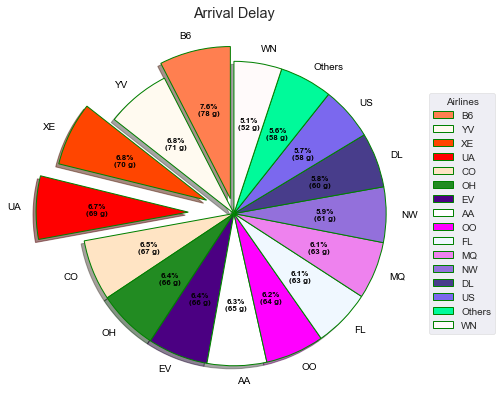

In [49]:
# Creating dataset
cars = set2_df.AL.values
data = set2_df.Mean.values

# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
#np.set_printoptions(precision = 1, suppress = True)
#explode = np.random.uniform(0,0.3,16)
#explode = tuple(explode)

# Creating color parameters
colors = tuple(colors)
 
# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "green"}
 
# Creating autopct arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), explode=explode, labels=cars, \
    shadow=True, colors=colors, startangle=90, wedgeprops=wp, textprops=dict(color="black"))
 
# Adding legend
ax.legend(wedges, set2_df.AL, title="Airlines", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Arrival Delay")
 
# Show plot
plt.show()

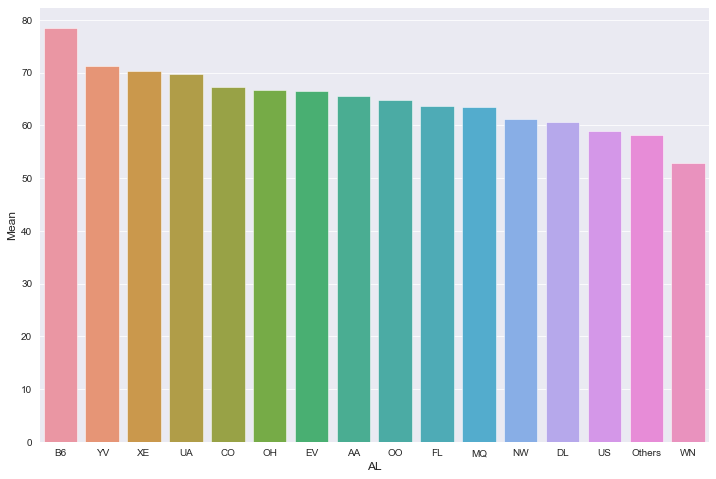

In [50]:
#  plot the mean of the records by airline
plt.figure(figsize=(12,8))
sns.barplot(x = "AL", y = "Mean", data = set2_df)
plt.show()

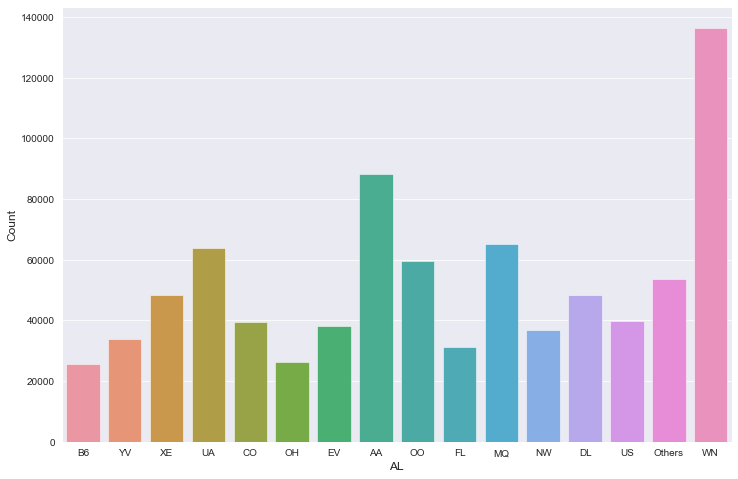

In [51]:
# plot the number of records by airline 
plt.figure(figsize=(12,8))
sns.barplot(x = "AL", y = "Count", data = set2_df)
plt.show()

In [52]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

In [53]:
# droping the country column 
set_df = set_df.drop(['DepTime','ArrTime','AirTime','ArrDelay','DepDelay'], axis=1) 

In [54]:
encoded_data = pd.get_dummies(set_df['AL'])
print(round(encoded_data, 1))

         AA  B6  CO  DL  EV  FL  MQ  NW  OH  OO  Others  UA  US  WN  XE  YV
695106    1   0   0   0   0   0   0   0   0   0       0   0   0   0   0   0
1497028   0   0   0   0   0   0   0   1   0   0       0   0   0   0   0   0
1599784   0   0   0   0   0   0   0   1   0   0       0   0   0   0   0   0
507616    0   0   0   0   0   0   1   0   0   0       0   0   0   0   0   0
1056664   1   0   0   0   0   0   0   0   0   0       0   0   0   0   0   0
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..     ...  ..  ..  ..  ..  ..
1280619   0   0   0   0   0   0   0   0   0   0       0   0   0   1   0   0
754308    0   0   0   0   0   0   0   0   0   0       0   0   0   1   0   0
717627    0   0   1   0   0   0   0   0   0   0       0   0   0   0   0   0
755276    0   0   0   0   0   0   0   0   0   0       0   0   0   1   0   0
195791    0   0   0   0   0   0   0   0   0   0       0   0   0   1   0   0

[835816 rows x 16 columns]


**Nivell 3**

- Exercici 3:
  
Resumeix les noves columnes generades de manera estadística i gràfica

In [55]:
encoded_data.describe(include='all')

,AA,B6,CO,DL,EV,FL,MQ,NW,OH,OO,Others,UA,US,WN,XE,YV
count,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00
mean,0.11,0.03,0.05,0.06,0.05,0.04,0.08,0.04,0.03,0.07,0.06,0.08,0.05,0.16,0.06,0.04
std,0.31,0.17,0.21,0.23,0.21,0.19,0.27,0.21,0.17,0.26,0.25,0.27,0.21,0.37,0.23,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Challenges of One-Hot Encoding: Dummy Variable Trap

One-Hot Encoding results in a Dummy Variable Trap as the outcome of one variable can easily be predicted with the help of the remaining variables.

> **Dummy Variable Trap is a scenario in which variables are highly correlated to each other.**

The Dummy Variable Trap leads to the problem known as **multicollinearity**. Multicollinearity occurs where there is a dependency between the independent features. Multicollinearity is a serious issue in machine learning models like [Linear Regression](https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/?utm_source=blog&utm_medium=one-hot-encoding-vs-label-encoding-using-scikit-learn) and [Logistic Regression](https://www.analyticsvidhya.com/blog/2015/11/beginners-guide-on-logistic-regression-in-r/?utm_source=blog&utm_medium=one-hot-encoding-vs-label-encoding-using-scikit-learn).

So, in order to overcome the problem of multicollinearity, one of the dummy variables has to be dropped. Here, I will practically demonstrate how the problem of multicollinearity is introduced after carrying out the one-hot encoding.

One of the common ways to check for multicollinearity is the Variance Inflation Factor (VIF):

* VIF=1, Very Less Multicollinearity
* VIF<5, Moderate Multicollinearity
* VIF>5, Extreme Multicollinearity (This is what we have to avoid)

Compute the VIF scores:

In [56]:
import statsmodels.api as sm
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], round(vif, 1)]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

df = encoded_data.copy()
calculate_vif(df)

,Var,Vif
0,AA,0.00
1,B6,0.00
2,CO,0.00
3,DL,0.00
4,EV,0.00
5,FL,0.00
6,MQ,0.00
7,NW,0.00
8,OH,0.00
9,OO,0.00


In [57]:
df2 = encoded_data.copy()
from statsmodels.stats.outliers_influence import variance_inflation_factor

#print(round(df2, 1))
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
vif["features"] = df2.columns
vif.round(1)

,VIF Factor,features
0,0.00,AA
1,0.00,B6
2,0.00,CO
3,0.00,DL
4,0.00,EV
5,0.00,FL
6,0.00,MQ
7,0.00,NW
8,0.00,OH
9,0.00,OO


## Variance Inflation Factor (VIF) Explained

Colinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values. In R use the corr function and in python this can by accomplished by using numpy's corrcoef function.

Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.

A common R function used for testing regression assumptions and specifically multicolinearity is ``"VIF()"`` and unlike many statistical concepts, its formula is straightforward:

$$
\text{V.I.F.} = \frac{1}{1-R^2}
$$

In [58]:
X_train_num.describe()

,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance
count,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00
mean,1559.21,1617.00,107.42,63.31,59.69,741.62
std,454.09,583.93,68.13,60.80,59.91,558.89
min,1.00,1.00,0.00,15.00,6.00,11.00
25%,1232.00,1326.00,58.00,26.00,24.00,334.00
50%,1619.00,1737.00,90.00,43.00,41.00,595.00
75%,1924.00,2048.00,136.00,79.00,75.00,972.00
max,2400.00,2400.00,1091.00,2461.00,2457.00,4962.00


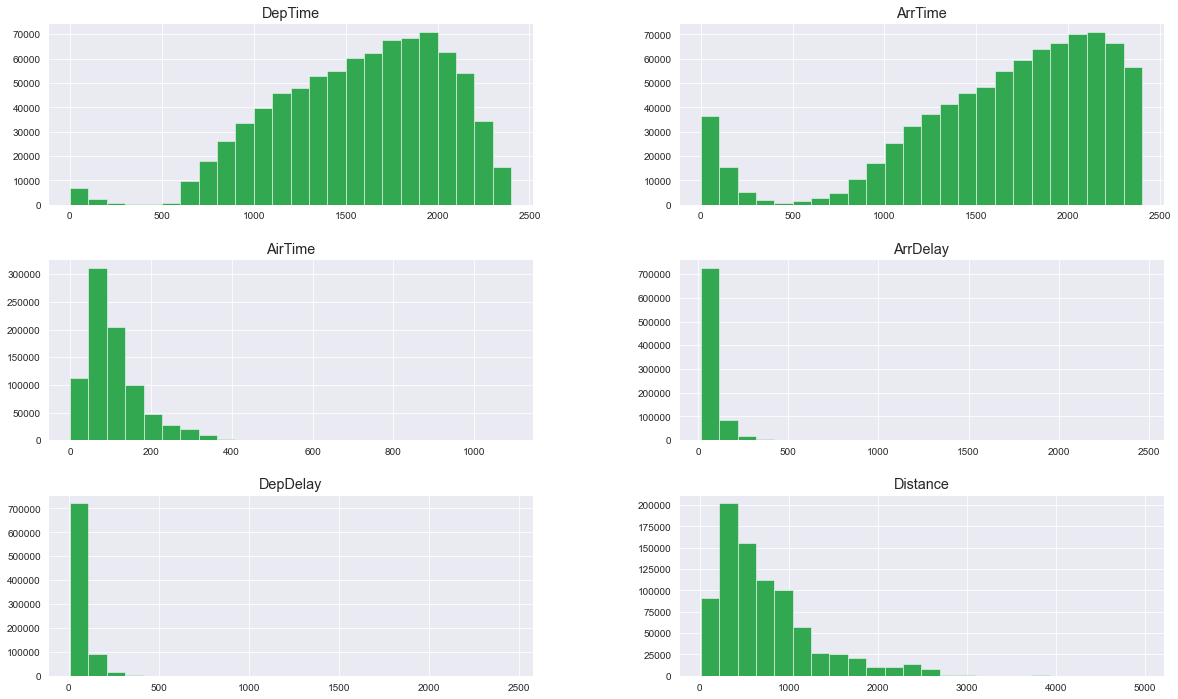

In [59]:
X_train_num.hist(figsize=(20, 12), color='#32a850', bins=24)
plt.show()

### The applied power transformation has transformed the features generating a standardized distribution of mean = 0 and std = 1 with different minimum and maximum values for each feature.

In [60]:
X_train_num_power.describe()

,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance
count,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00
mean,0.00,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.67,-2.35,-7.98,-1.77,-2.31,-4.30
25%,-0.78,-0.63,-0.72,-0.79,-0.66,-0.72
50%,0.08,0.14,0.01,-0.01,-0.02,0.02
75%,0.81,0.78,0.69,0.79,0.70,0.70
max,2.04,1.54,4.07,3.24,4.51,3.19


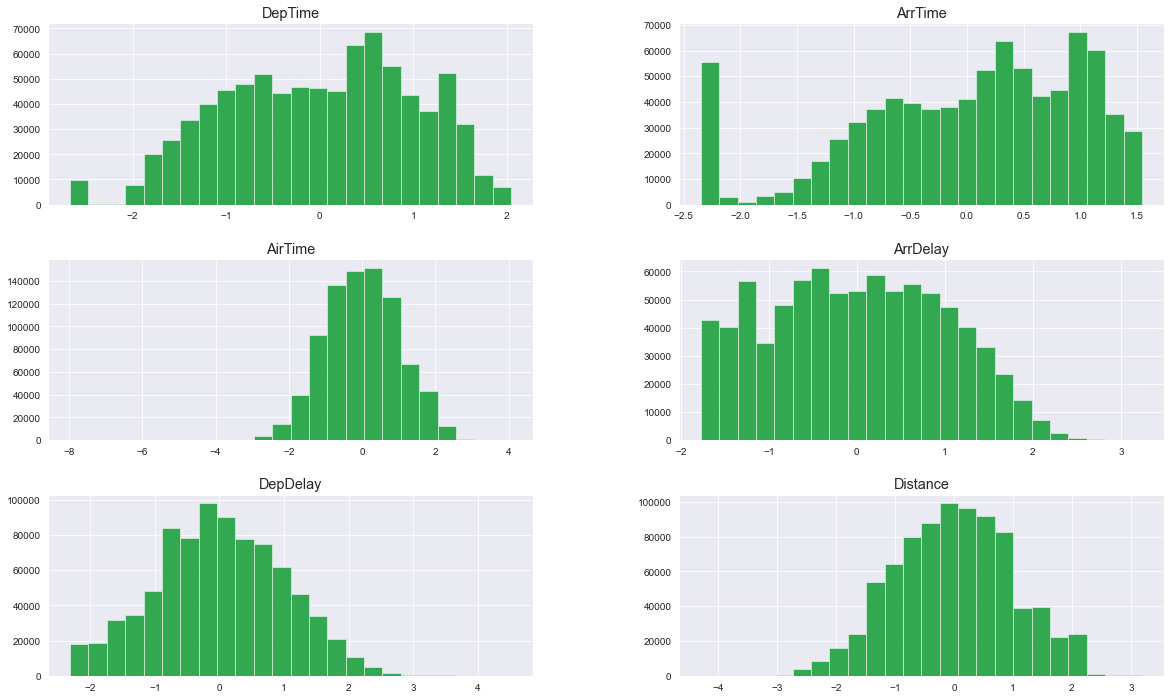

In [61]:
X_train_num_power.hist(figsize=(20, 12), color='#32a850', bins=24)
plt.show()

### The application of a quantile-type transformation with respect to the original distribution makes it look more like a Gaussian distribution. In cases where a bias has been detected, if it has not cancelled it out in the worst case it is possible to see a decrease in the bias.  

In [62]:
X_train_num_quant.describe()

,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance
count,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00
mean,-0.00,0.00,0.01,-0.08,-0.03,0.00
std,1.00,1.02,1.00,1.25,1.10,1.00
min,-5.20,-5.20,-5.20,-5.20,-5.20,-5.20
25%,-0.68,-0.67,-0.66,-0.65,-0.66,-0.67
50%,-0.00,0.00,0.01,-0.00,-0.00,0.00
75%,0.67,0.68,0.68,0.68,0.68,0.68
max,5.20,5.20,5.20,5.20,5.20,5.20


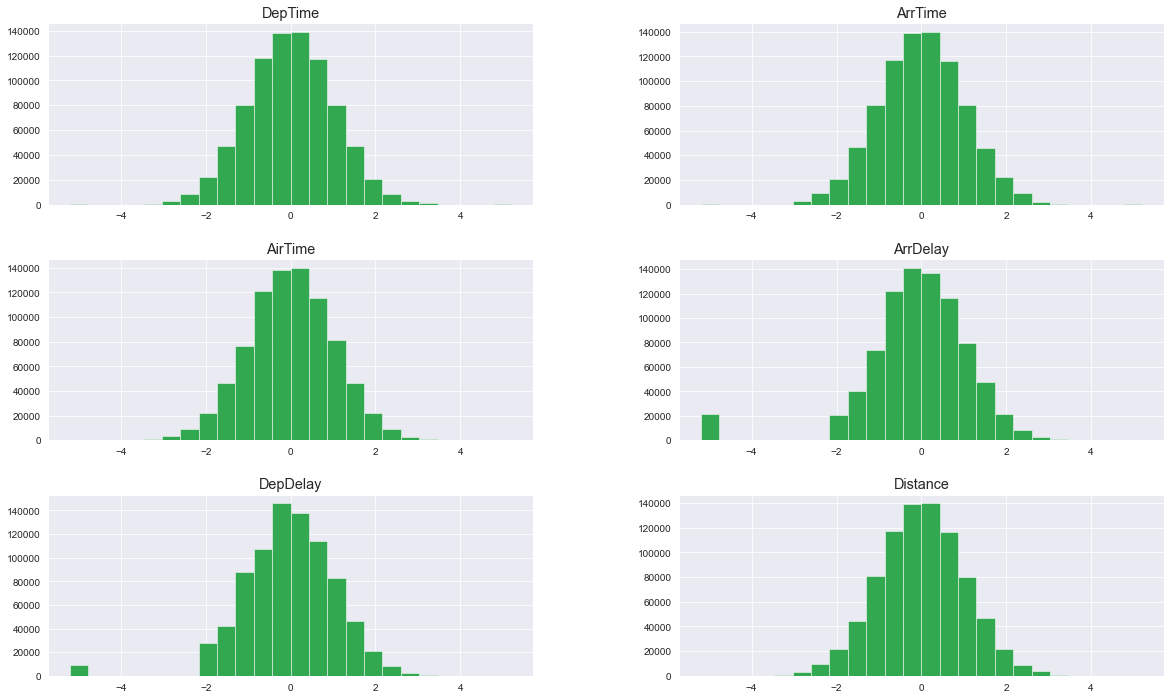

In [63]:
X_train_num_quant.hist(figsize=(20, 12), color='#32a850', bins=24)
plt.show()

In [64]:
X_train_time_dist.describe()

,AirTime(X1),Distance(X2),X1^2,X1·X2,X2^2
count,835816.00,835816.00,835816.00,835816.00,835816.00
mean,107.42,741.62,16182.28,116918.80,862352.98
std,68.13,558.89,22975.56,178448.19,1419448.79
min,0.00,11.00,0.00,0.00,121.00
25%,58.00,334.00,3364.00,19278.00,111556.00
50%,90.00,595.00,8100.00,53010.00,354025.00
75%,136.00,972.00,18496.00,131655.00,944784.00
max,1091.00,4962.00,1190281.00,3294768.00,24621444.00


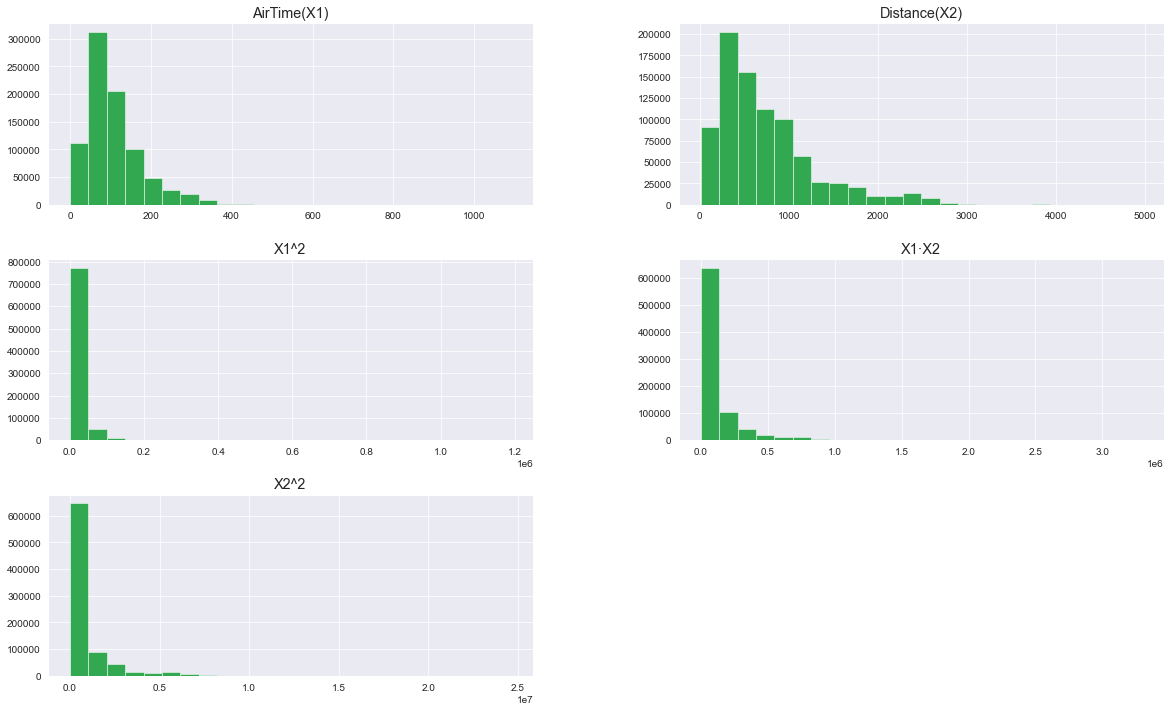

In [65]:
X_train_time_dist.hist(figsize=(20, 12), color='#32a850', bins=24)
plt.show()